In [1]:
import pandas as pd
import os

In [2]:
import seaborn as sns

In [65]:
data_dir = "./data/"
dataset = './data/awsvm/noautovac_ycsb_scale_100_worktime_300_samplefreq_1_tsizeAnddeadtuple_pgconfig_delete_25.csv'

In [66]:
df = pd.read_csv(dataset)

In [67]:
df.head()

,ds,table_name,relid,schemaname,relname,seq_scan,seq_tup_read,idx_scan,idx_tup_fetch,n_tup_ins,...,n_ins_since_vacuum,last_vacuum,last_autovacuum,last_analyze,last_autoanalyze,vacuum_count,autovacuum_count,analyze_count,autoanalyze_count,pg_table_size
0,1.650424e+09,public.usertable,16480,public,usertable,1,0,0,0,100000,...,100000,NaN,NaN,NaN,NaN,0,0,0,0,117096448
1,1.650424e+09,public.usertable,16480,public,usertable,1,0,0,0,100000,...,100000,NaN,NaN,NaN,NaN,0,0,0,0,117153792
2,1.650424e+09,public.usertable,16480,public,usertable,1,0,0,0,100000,...,100000,NaN,NaN,NaN,NaN,0,0,0,0,117334016
3,1.650424e+09,public.usertable,16480,public,usertable,1,0,0,0,100000,...,100000,NaN,NaN,NaN,NaN,0,0,0,0,117522432
4,1.650424e+09,public.usertable,16480,public,usertable,1,0,0,0,100000,...,100000,NaN,NaN,NaN,NaN,0,0,0,0,117727232


In [68]:
df.table_name.unique()

array(['public.usertable'], dtype=object)

In [69]:
df.columns

Index(['ds', 'table_name', 'relid', 'schemaname', 'relname', 'seq_scan',
       'seq_tup_read', 'idx_scan', 'idx_tup_fetch', 'n_tup_ins', 'n_tup_upd',
       'n_tup_del', 'n_tup_hot_upd', 'n_live_tup', 'n_dead_tup',
       'n_mod_since_analyze', 'n_ins_since_vacuum', 'last_vacuum',
       'last_autovacuum', 'last_analyze', 'last_autoanalyze', 'vacuum_count',
       'autovacuum_count', 'analyze_count', 'autoanalyze_count',
       'pg_table_size'],
      dtype='object')

In [70]:
df['ds'] = df['ds']-df['ds'].min()
df['ds'] = pd.to_datetime(df['ds'], unit='s')

In [71]:
def plot_growth(df, col):
    return sns.lineplot(data=df, x='ds', y=col, hue='table_name')

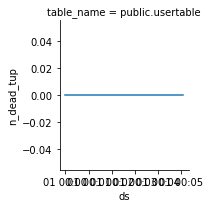

In [72]:
g = sns.FacetGrid(df, row='table_name', sharey=False)
g.map(sns.lineplot, "ds", "n_dead_tup")

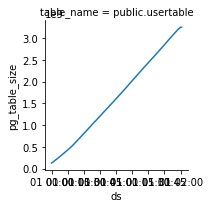

In [54]:
g2 = sns.FacetGrid(df, row='table_name', sharey=False)
g2.map(sns.lineplot, "ds", "pg_table_size")

<AxesSubplot:>

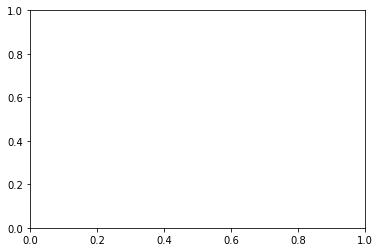

In [55]:
plot_growth(df[df['table_name'] == 'public.customer'].copy(), 'pg_table_size')

<AxesSubplot:>

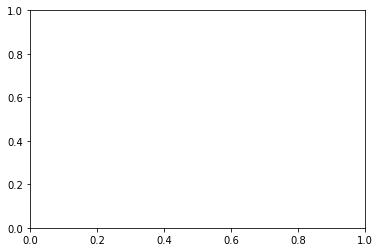

In [16]:
plot_growth(df[df['table_name'] == 'public.stock'].copy(), 'n_dead_tup')